# ANALISIS E INSIGHTS

## SET UP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

#Automcompletar rápido
%config IPCompleter.greedy=True

pd.options.display.max_columns = None

## CARGA DE DATOS

In [2]:
con = sa.create_engine('sqlite:///../Datos/airbnb.db')

df = pd.read_sql('df_preparado', con = con)

df.head()

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_oceano,pdi_plaza
0,0,0,48154,Rental unit in Valencia · ★4.56 · 2 bedrooms ·...,219476,LA SAIDIA,MORVEDRE,39.48375,-0.37502,Entire home/apt,89,4,4,52,Segundo piso en una finca de finales del siglo...,f,4,2.0,2.0,137,4.56,4.74,4.43,1951,LA SAIDIA,89.0,85,02_Dos,4-5,1-2,91-807,70,95599.0,4.210471,0.818796
1,1,1,55692,Rental unit in Valencia · 1 bedroom · 1 bed,120649,CIUTAT VELLA,LA SEU,39.47658,-0.37654,Entire home/apt,100,1,1,0,A great place to stay and visit Valencia.<br /...,f,3,1.0,1.0,1,5.00,5.00,5.00,3255,CIUTAT VELLA,100.0,100,01_Una,0-3,1-2,1-13,50,113925.0,3.658376,0.110409
2,2,2,100347,Rental unit in València · ★4.58 · 3 bedrooms ·...,1451371,EXTRAMURS,ARRANCAPINS,39.45965,-0.38453,Entire home/apt,171,3,1,0,Te va a encantar mi espacio por la ubicación y...,f,6,3.0,3.0,142,4.58,4.88,4.79,2670,EXTRAMURS,171.0,100,03_Tres,6-16,3-4,91-807,90,168210.0,3.246223,2.024457
3,3,3,102524,Villa in Valencia · ★4.56 · 5 bedrooms · 20 be...,535881,POBLATS MARITIMS,LA MALVA-ROSA,39.48197,-0.32456,Entire home/apt,532,2,7,87,"JUST FOR RELAXED GROUPS. , just families. <br ...",f,16,5.0,20.0,197,4.56,4.69,4.81,2168,POBLATS MARITIMS,532.0,76,04_Cuatro o mas,6-16,5-68,91-807,150,227640.0,3.878245,4.398123
4,4,4,136378,Condo in Valencia · ★4.46 · 1 bedroom · 2 beds...,591197,CIUTAT VELLA,EL MERCAT,39.47358,-0.37815,Entire home/apt,75,28,3,6,<b>The space</b><br />The apartment at Calle R...,f,3,1.0,2.0,25,4.46,4.80,4.84,3255,CIUTAT VELLA,75.0,98,01_Una,0-3,1-2,14-90,50,113925.0,3.518487,0.398231


## ANALISIS

### Analisis sobre el precio

#### **¿Cual es el precio medio? ¿y el rango de precios?¿Y por distritos?¿Y por barrios?**

#### **¿Cual es el ranking de distritos y barrios por precio medio de alquiler?**

In [3]:
df.precio_total.describe()

count    8324.000000
mean      120.389572
std       204.778577
min        25.000000
25%        58.000000
50%        97.000000
75%       136.000000
max      6286.000000
Name: precio_total, dtype: float64

Vemos que hay al menos un atípico, en la zona alta que  sesga la media, por tanto vamos a usar la mediana como medida de centralización más fiable.

In [4]:
df.precio_total.median()

97.0

In [5]:
df.groupby('neighbourhood').precio_total.median().sort_values(ascending = False)

neighbourhood
CARPESA                 400.0
EL PLA DEL REMEI        150.0
CIUTAT UNIVERSITARIA    145.0
BENIFERRI               140.0
FAITANAR                132.5
                        ...  
LA CREU COBERTA          42.5
TRES FORQUES             40.0
BENIFARAIG               35.0
LA LLUM                  34.0
POBLE NOU                30.0
Name: precio_total, Length: 85, dtype: float64

In [6]:
df.neighbourhood.value_counts()

neighbourhood
CABANYAL-CANYAMELAR     912
RUSSAFA                 613
EL MERCAT               379
AIORA                   332
EL CARME                332
                       ... 
EL FORN D'ALCEDO          2
CARPESA                   1
MAHUELLA-TAULADELLA       1
BENIFARAIG                1
CASTELLAR-L'OLIVERAL      1
Name: count, Length: 85, dtype: int64

**Destaca el precio de CARPESA, pero al tener 1 sólo dato no es representativo**

In [7]:
df.groupby('distrito').precio_total.median().sort_values(ascending = False)

distrito
CIUTAT VELLA         114.0
L'EIXAMPLE           108.0
POBLATS MARITIMS     105.0
EXTRAMURS            100.0
CAMINS AL GRAU        93.0
POBLATS DEL SUD       92.5
CAMPANAR              90.0
EL PLA DEL REAL       87.0
POBLATS DE L'OEST     86.0
LA SAIDIA             85.0
QUATRE CARRERES       80.5
ALGIROS               80.0
BENIMACLET            74.0
POBLATS DEL NORD      73.0
JESUS                 70.0
PATRAIX               69.5
RASCANYA              66.1
L'OLIVERETA           66.0
BENICALAP             60.0
Name: precio_total, dtype: float64

**No vemos nada que esté fuera de lo común.  A la cabeza ciudades como L'Eixample y  Ciutat Vella**




Esto nos lleva a comparar el precio medio por distrito con el precio medio de compra también por distrito.

In [8]:
temp = df.groupby('distrito')[['precio_total','precio_compra']].median()
temp

,precio_total,precio_compra
distrito,,
ALGIROS,80.0,79555.0
BENICALAP,60.0,63385.0
BENIMACLET,74.0,72835.0
CAMINS AL GRAU,93.0,78120.0
CAMPANAR,90.0,95760.0
CIUTAT VELLA,114.0,113925.0
EL PLA DEL REAL,87.0,104755.0
EXTRAMURS,100.0,93450.0
JESUS,70.0,62335.0


C:\Users\pedro\AppData\Local\Temp\ipykernel_1472\3384615498.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada])


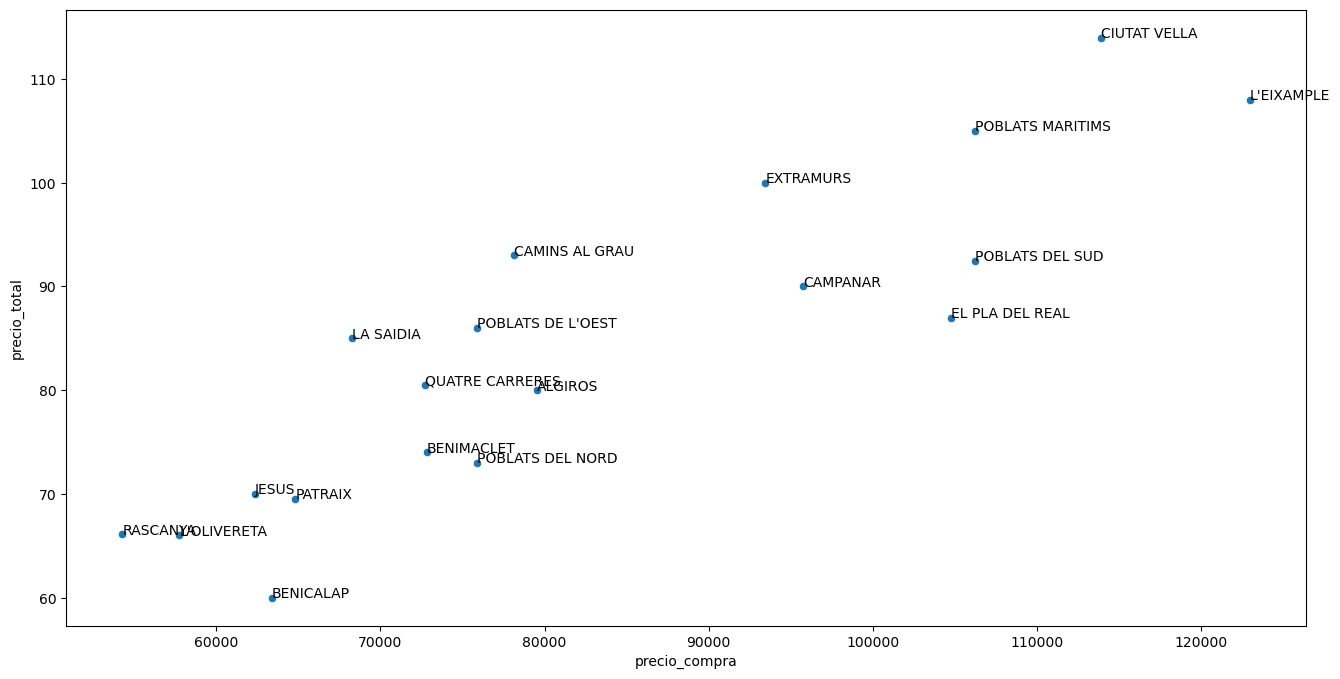

In [9]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada])

Existe una clara correlación entre el precio de compra en cada distrito y el precio que podremos cobrar.

Claramente se perciben tres clusters de bajo-bajo, medio-medio y alto-alto.

No hay a priori ningún "chollo" claro a este nivel.

Vamos a repetir el análisis a nivel de barrio a ver si identificamos algo.

In [10]:
temp = df.groupby('neighbourhood')[['precio_total','precio_compra']].median()
temp

,precio_total,precio_compra
neighbourhood,,
AIORA,89.0,78120.0
ALBORS,86.0,78120.0
ARRANCAPINS,92.5,93450.0
BENICALAP,61.0,63385.0
BENIFARAIG,35.0,75880.0
...,...,...
TORMOS,50.0,68285.0
TORREFIEL,49.0,54285.0
TRES FORQUES,40.0,57750.0


In [150]:
df.loc[df['neighbourhood']== 'CARPESA']

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_oceano,pdi_plaza,num_inmuebles_por_barrio,influencia_competencia
8270,1349,1349,22409066,Home in Valencia · ★4.74 · 3 bedrooms · 4 beds...,164034271,POBLATS DEL NORD,CARPESA,39.51585,-0.37786,Entire home/apt,400,2,1,67,Casual House se encuentra en l'horta de Valenc...,f,9,3.0,4.0,23,4.74,4.96,4.43,2168,POBLATS DEL NORD,400.0,81,03_Tres,6-16,3-4,14-90,90,136584.0,7.533357,4.394457,1,81.0


C:\Users\pedro\AppData\Local\Temp\ipykernel_1472\4004031584.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada])


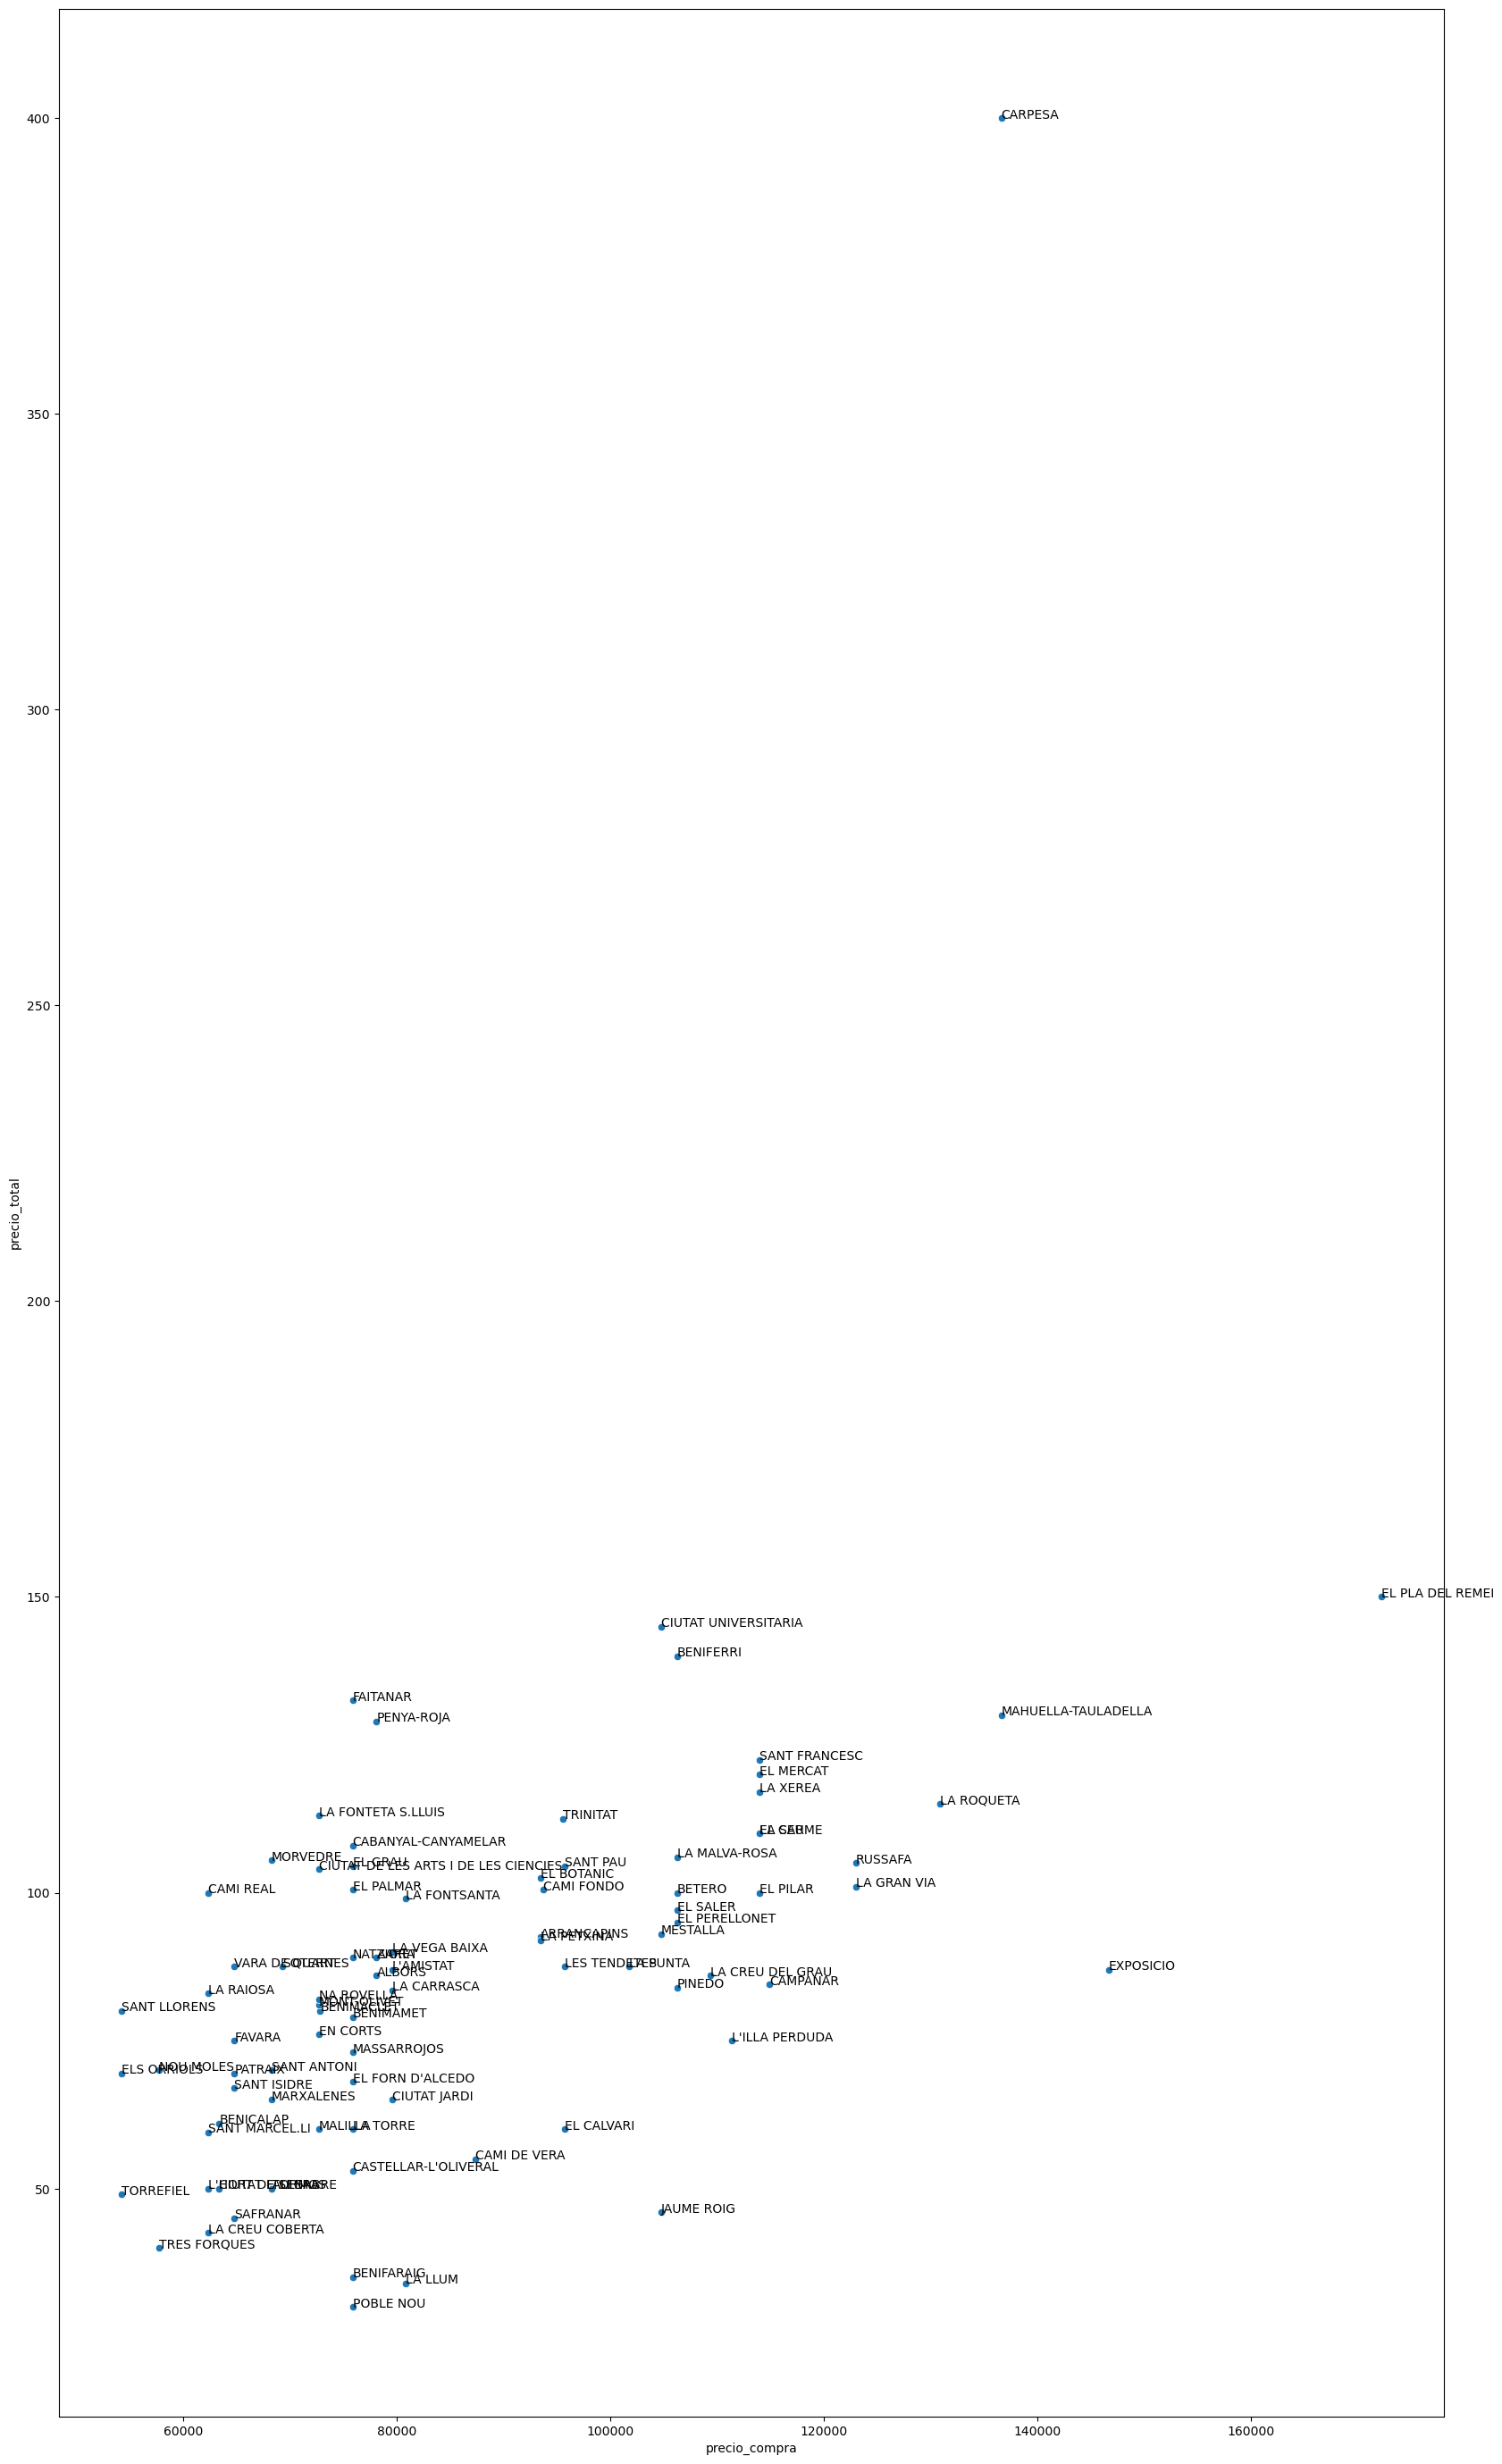

In [11]:
plt.figure(figsize = (20,35))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada])

A este nivel ya vemos más cosas:

* 1 barrio que sobresale  CARPESA, como hemos comentado antes, solo disponemos de 1 datos, sería interesante intentar recoger mas datos de este barrio
* Dentro de cada grupo de bajo-medio-alto sí podemos empezar a separarar
    * Bajo: CAMI REAL, MORVEDRE
    * Medio: FAITANAR,PENYA-ROJA
    * Medio-alto: CIUTAT UNIVERSITARIA,BENIFERRI
    * Alto: MAHUELLA-TAULADELLA, LA ROQUETA
    
**Insight 1: Existen ciertos barrios que apriori pueden maximizar la relación coste-ingresos y además podemos segmentarlo por el tipo calidad del inmueble en el que nos interes invertir. Sería interesante conseguir más datos sobre CARPESA**

#### **¿Qué factores (a parte de la localización determinan el precio del alquiler?**

Para responder a esta pregunta podemos construir un minicubo, ya que hemos discretizado nuestras variables de análisis.

In [110]:
#Paso 1: Seleccionar qué variables serán la métricas y cuales las dimensiones
metricas = ['precio_total','precio_compra']
dimensiones = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc','m2','room_type']

minicubo_precio = df[dimensiones + metricas]
minicubo_precio

,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,room_type,precio_total,precio_compra
0,02_Dos,4-5,1-2,91-807,70,Entire home/apt,89.0,95599.0
1,01_Una,0-3,1-2,91-807,50,Entire home/apt,77.0,68285.0
2,02_Dos,4-5,3-4,91-807,70,Entire home/apt,88.0,95599.0
3,04_Cuatro o mas,6-16,5-68,14-90,120,Entire home/apt,300.0,163884.0
4,03_Tres,4-5,3-4,14-90,90,Entire home/apt,73.0,122913.0
...,...,...,...,...,...,...,...,...
8319,01_Una,4-5,3-4,1-13,50,Entire home/apt,160.0,104755.0
8320,01_Una,0-3,1-2,1-13,50,Entire home/apt,145.0,104755.0
8321,01_Una,0-3,1-2,1-13,50,Entire home/apt,145.0,104755.0
8322,01_Una,0-3,1-2,1-13,50,Private room,25.0,104755.0


In [111]:
#Paso 2: pasar a transaccional las dimensiones
minicubo_precio = minicubo_precio.melt(id_vars=['precio_total','precio_compra'])
minicubo_precio

,precio_total,precio_compra,variable,value
0,89.0,95599.0,bedrooms_disc,02_Dos
1,77.0,68285.0,bedrooms_disc,01_Una
2,88.0,95599.0,bedrooms_disc,02_Dos
3,300.0,163884.0,bedrooms_disc,04_Cuatro o mas
4,73.0,122913.0,bedrooms_disc,03_Tres
...,...,...,...,...
49939,160.0,104755.0,room_type,Entire home/apt
49940,145.0,104755.0,room_type,Entire home/apt
49941,145.0,104755.0,room_type,Entire home/apt
49942,25.0,104755.0,room_type,Private room


In [134]:
#Paso 3: Agregar las métricas por "variable" y "valor" con las funciones deseadas
minicubo_precio = minicubo_precio.groupby(['variable','value'])[['precio_total','precio_compra']].agg('median')

minicubo_precio

precio_total  precio_compra
variable               value                                       
accommodates_disc      0-3                      60.0        78120.0
                       4-5                     115.0       113925.0
                       6-16                    149.5       140616.0
bedrooms_disc          01_Una                   70.0        78120.0
                       02_Dos                  118.0       109368.0
                       03_Tres                 125.0       136584.0
                       04_Cuatro o mas         152.0       190932.0
beds_disc              1-2                      79.0        79555.0
                       3-4                     120.0       136584.0
                       5-68                    157.0       182112.0
m2                     50                       70.0        78120.0
                       70                      118.0       109368.0
                       90                      125.0       136584.0
                       120                     143.0       187488.0
                       150                     240.0       234360.0
number_of_reviews_disc 1-13                     94.0       103950.0
                       14-90                    98.0       106232.0
                       91-807                  100.0       113925.0
room_type              Entire home/apt         114.0       113925.0
                       Private room             45.0        75880.0
                       Shared room              50.5        72765.0

Sobre el minicubo vamos analizando cada variable.

In [143]:
minicubo_precio.head(3)

precio_total  precio_compra  rentabilidad_m2
variable          value                                              
accommodates_disc 0-3            60.0        78120.0         0.076805
                  4-5           115.0       113925.0         0.100944
                  6-16          149.5       140616.0         0.106318

In [144]:
minicubo_precio.loc['bedrooms_disc']

,precio_total,precio_compra,rentabilidad_m2
value,,,
01_Una,70.0,78120.0,0.089606
02_Dos,118.0,109368.0,0.107893
03_Tres,125.0,136584.0,0.091519
04_Cuatro o mas,152.0,190932.0,0.079609


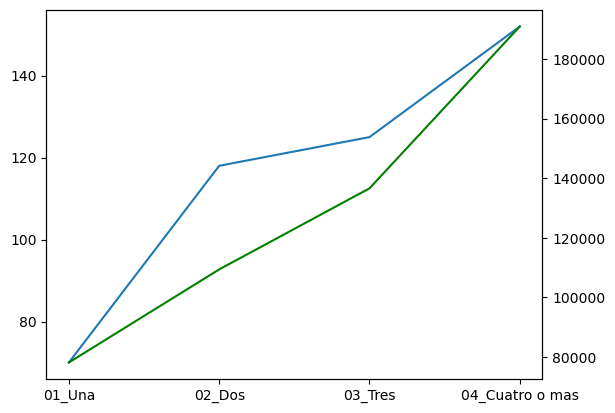

In [145]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['bedrooms_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['bedrooms_disc'].precio_compra,color = 'green');

**Insight 2: el número de habitaciones óptimo es 2, evitar 3**. 

En cuanto al número de habitaciones destacamos que 02_Dos habitaciones es el punto óptimo, a partir de ese punto el precio de compra sube pero el que podemos cobra baja



In [115]:
minicubo_precio.loc['beds_disc']

,precio_total,precio_compra
value,,
1-2,79.0,79555.0
3-4,120.0,136584.0
5-68,157.0,182112.0


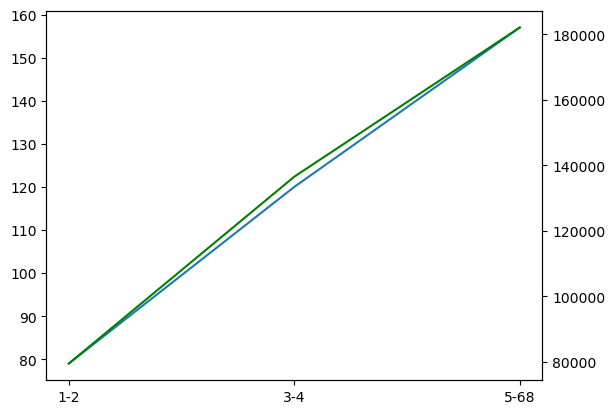

In [116]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['beds_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['beds_disc'].precio_compra,color = 'green');



Nada a destacar, guardan una relación lineal entre el número de camas y el precio de compra/total. Vamos a comprobar si los propietarios están intentando meter mayor nº de camas por habitación para aumentar la rentabilidad.

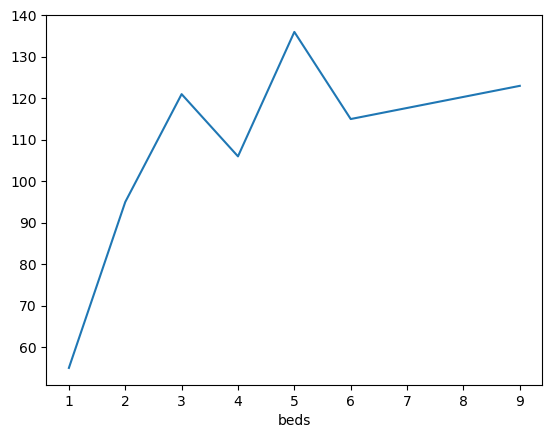

In [117]:
df[df.bedrooms == 1].groupby('beds').precio_total.median().plot();

Efectivamente aquí hay algo, ya que figura que para pisos de una habitación hay gente que está metiendo hasta 9 camas! Seguramente se trate de habitaciones compartidadas con literas

Sería un tema a explorar con más detalle y comentar con alguien que conozca el negocio.

Vamos a ver unos ejemplos:

In [118]:
df.loc[(df.bedrooms == 1)& (df.beds > 6)]

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_oceano,pdi_plaza,num_inmuebles_por_barrio,influencia_competencia
5171,3815,3815,53340113,Vacation home in València · 1 bedroom · 9 beds...,195184288,QUATRE CARRERES,CIUTAT DE LES ARTS I DE LES CIENCIES,39.45369,-0.3577,Entire home/apt,123,15,5,365,Crea recuerdos inolvidables en este alojamient...,f,6,1.0,9.0,0,NaN,NaN,NaN,2077,QUATRE CARRERES,123.0,0,01_Una,6-16,5-68,1-13,50,72695.0,0.850611,2.941696,89,0.0


Vamos a analizar ahora por el número de huéspedes que aceptan

In [119]:
minicubo_precio.loc['accommodates_disc']

,precio_total,precio_compra
value,,
0-3,60.0,78120.0
4-5,115.0,113925.0
6-16,149.5,140616.0


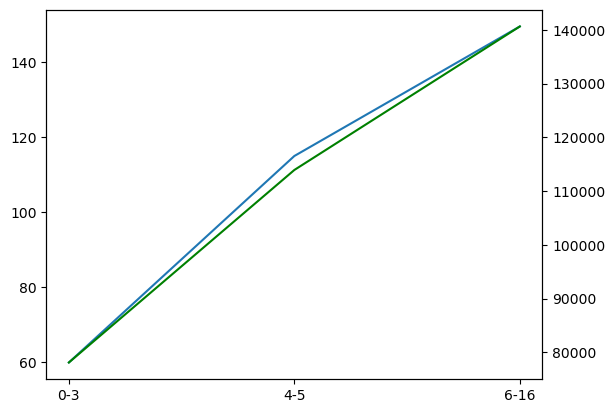

In [120]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['accommodates_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['accommodates_disc'].precio_compra,color = 'green');

No vemos nada significativo, la relacion entre nº de huéspedes a alojar y el precio es lineal.

Por último vamos a analizar la variable que hemos construído de cercanía a un punto de interés para ver si tiene efecto sobre el precio de las habitaciones.



En este caso como hemos construído la distancia a Oceanografic y plaza de la virgen  vamos a evaluar solo los distritos para lo que esto puede ser relevante, es decir los más céntricos.

Para ello primero vamos a calcular la distancia media por distrito y elegir un punto de corte.

In [121]:
df.groupby('distrito').pdi_oceano.median().sort_values()

distrito
CAMINS AL GRAU        1.500391
QUATRE CARRERES       1.688114
ALGIROS               2.266420
POBLATS MARITIMS      2.460942
L'EIXAMPLE            2.465988
EL PLA DEL REAL       2.557849
JESUS                 3.484285
CIUTAT VELLA          3.576740
EXTRAMURS             3.662530
BENIMACLET            3.879981
PATRAIX               3.947352
LA SAIDIA             4.362185
L'OLIVERETA           4.780335
RASCANYA              5.058489
CAMPANAR              5.092044
BENICALAP             5.871546
POBLATS DE L'OEST     8.186088
POBLATS DEL NORD      9.054092
POBLATS DEL SUD      15.825946
Name: pdi_oceano, dtype: float64

Vamos a cortar en EL PLA DEL REAL incluído.

Y sobre esa selección vamos a visualizar con un scatter.

In [122]:
df.groupby('distrito').pdi_oceano.median().sort_values()[0:6].index.to_list()

['CAMINS AL GRAU',
 'QUATRE CARRERES',
 'ALGIROS',
 'POBLATS MARITIMS',
 "L'EIXAMPLE",
 'EL PLA DEL REAL']

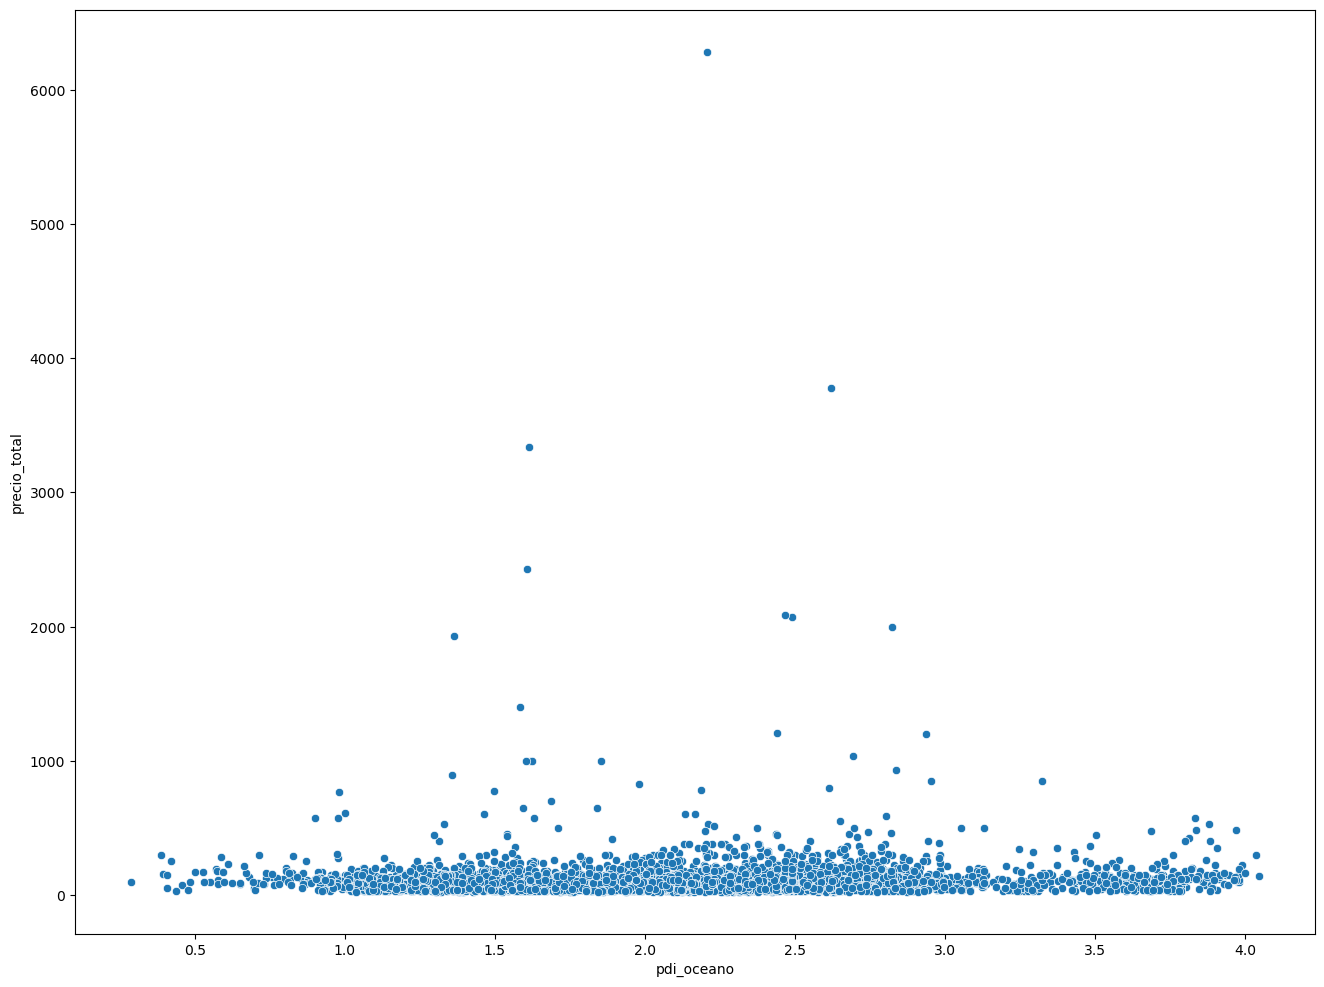

In [123]:
seleccion = df.groupby('distrito').pdi_oceano.median().sort_values()[0:6].index.to_list()

plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df.distrito.isin(seleccion)], x = 'pdi_oceano', y = 'precio_total');

No parece haber una relación tan directa como sería esperable entre la distancia al  Oceanografic y el precio de alquiler.

Vamos a comprobar ahora con el pdi de la plaza de la virgen:

In [124]:
df.groupby('distrito').pdi_plaza.median().sort_values()

distrito
CIUTAT VELLA          0.485950
LA SAIDIA             1.023983
EXTRAMURS             1.248858
L'EIXAMPLE            1.606101
EL PLA DEL REAL       1.632250
BENIMACLET            1.640145
CAMPANAR              1.691868
RASCANYA              2.007173
L'OLIVERETA           2.125843
PATRAIX               2.314784
QUATRE CARRERES       2.330747
BENICALAP             2.344219
ALGIROS               2.527358
JESUS                 2.555433
CAMINS AL GRAU        2.840926
POBLATS MARITIMS      4.000459
POBLATS DE L'OEST     4.656035
POBLATS DEL NORD      5.819327
POBLATS DEL SUD      18.965316
Name: pdi_plaza, dtype: float64

Vamos  a cortar en CAMPANAR incluido.

In [125]:
df.groupby('distrito').pdi_plaza.median().sort_values()[0:7].index.to_list()

['CIUTAT VELLA',
 'LA SAIDIA',
 'EXTRAMURS',
 "L'EIXAMPLE",
 'EL PLA DEL REAL',
 'BENIMACLET',
 'CAMPANAR']

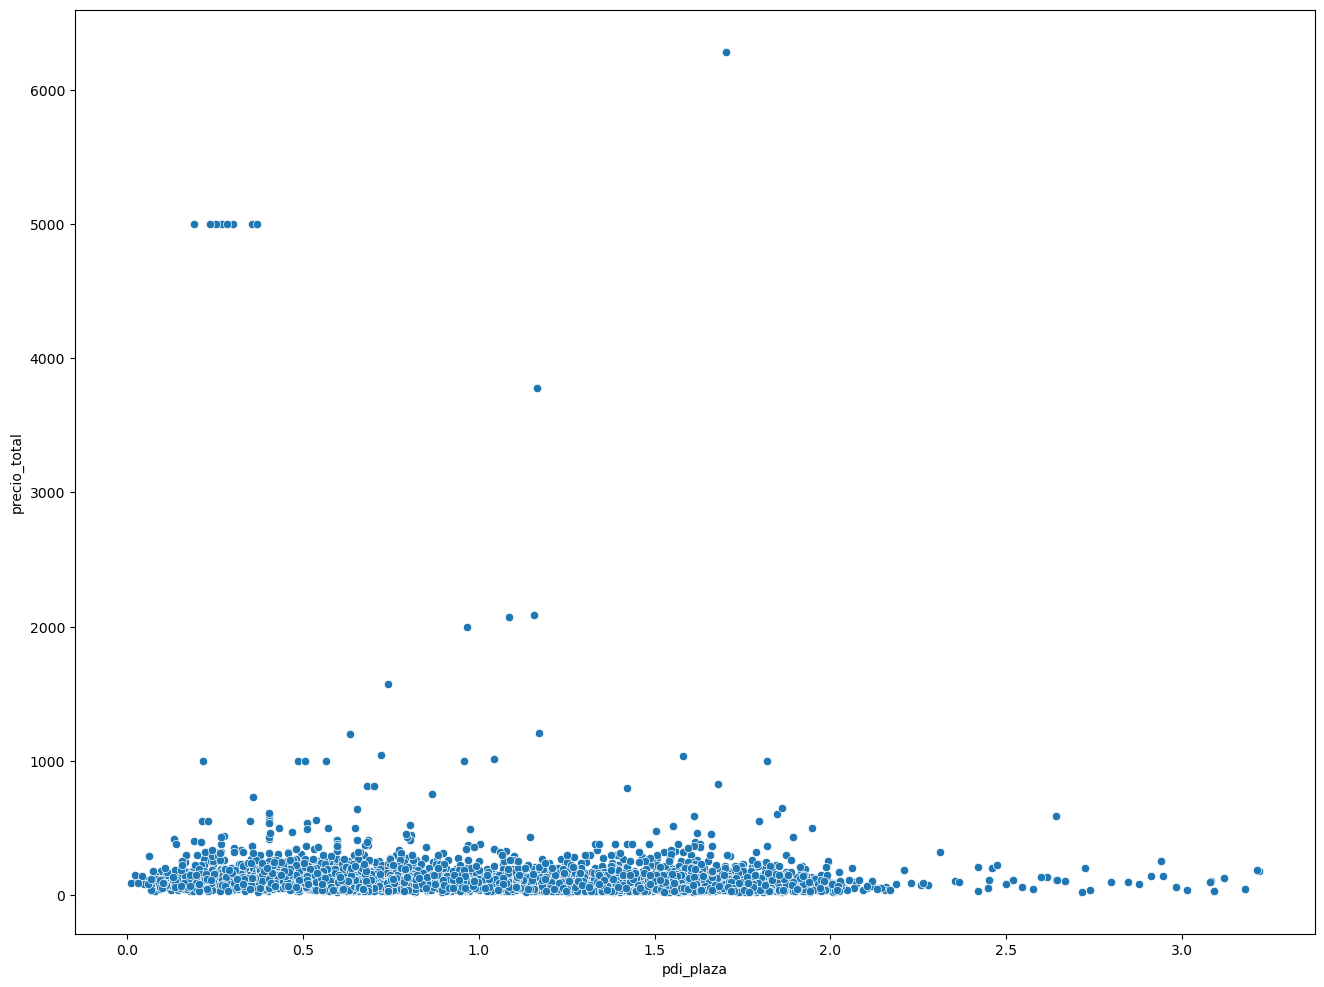

In [126]:
seleccion = df.groupby('distrito').pdi_plaza.median().sort_values()[0:7].index.to_list()

plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df.distrito.isin(seleccion)], x = 'pdi_plaza', y = 'precio_total');

**Insight 3 : Estando dentro del distrito parece que la cercanía a puntos de interés no tiene tanto impacto como sería esperable. Eso abre la puerta a buscar inmuebles que estando en un distrito céntrico no estén justo al lado del Punto de interés y por tanto esperablmente tengan un precio de compra menor**

#### **¿Cual es la relación entre el tamaño del inmueble y el precio por el que se puede alquilar?**

In [142]:
minicubo_precio['rentabilidad_m2']= minicubo_precio['precio_total'] / minicubo_precio['precio_compra'] *100

In [146]:
minicubo_precio.loc['m2']

,precio_total,precio_compra,rentabilidad_m2
value,,,
50,70.0,78120.0,0.089606
70,118.0,109368.0,0.107893
90,125.0,136584.0,0.091519
120,143.0,187488.0,0.076272
150,240.0,234360.0,0.102407


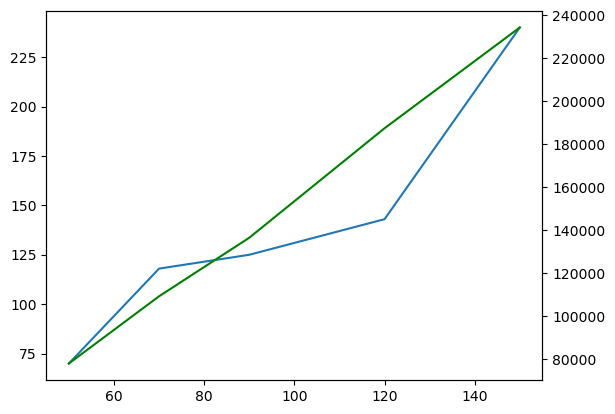

In [130]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['m2'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['m2'].precio_compra,color = 'green');

**Conclusion**:
- 70 m2 es el piso mas rentable, al contratio de los 50 m2, son los menos rentables

**Insight: Existen tamaños de pisos que optimizan la rentabilidad**

#### **¿Cómo varían los precios por tipo de alquiler (todo el piso, habitación privada, habitación compartida)?**

In [147]:
minicubo_precio.loc['room_type']

,precio_total,precio_compra,rentabilidad_m2
value,,,
Entire home/apt,114.0,113925.0,0.100066
Private room,45.0,75880.0,0.059304
Shared room,50.5,72765.0,0.069401


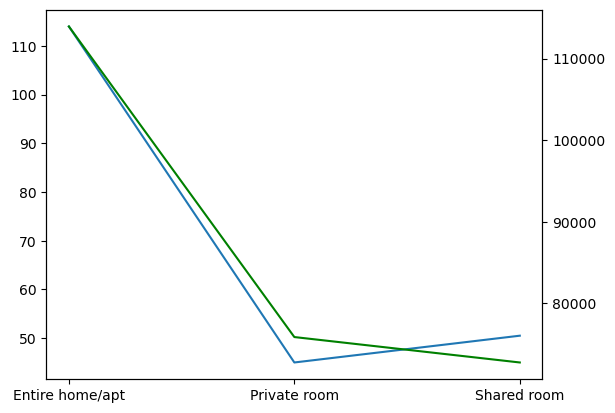

In [148]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['room_type'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['room_type'].precio_compra,color = 'green');

**Conclusion**:
- Priorizar compra de apartamentos completos

- Priorar compra de Shared room frente Private room, son más económicas y tienen un precio medio superior

**Insight: Existen diferencias entre el tipo de alquiler y su precio**

### Analisis sobre la ocupación

#### **¿Cual es la ocupación media? ¿Y por distritos?¿Y por barrios?**

#### **¿Cual es el ranking de distritos y barrios por ocupación?**

In [31]:
df.ocupacion.describe()

count    8324.000000
mean       55.308866
std        33.691241
min         0.000000
25%        24.000000
50%        61.000000
75%        85.000000
max       100.000000
Name: ocupacion, dtype: float64

En este caso vemos que la ocupación media es del 55%, al no tener mucha diferencia con la mediana, nos quedaremos con la media como medida de centralizacion

In [32]:
df.groupby('distrito').ocupacion.mean().sort_values(ascending = False)

distrito
BENIMACLET           60.628571
CAMINS AL GRAU       60.354223
ALGIROS              59.982249
CAMPANAR             57.271930
L'EIXAMPLE           57.018617
EL PLA DEL REAL      56.930636
LA SAIDIA            56.825613
EXTRAMURS            56.775112
PATRAIX              56.589286
CIUTAT VELLA         54.598965
POBLATS MARITIMS     54.542803
QUATRE CARRERES      53.987915
POBLATS DEL NORD     53.222222
BENICALAP            50.345238
RASCANYA             50.166667
JESUS                50.059289
POBLATS DE L'OEST    50.050000
L'OLIVERETA          48.496000
POBLATS DEL SUD      47.804598
Name: ocupacion, dtype: float64

No vemos nada destacable

In [33]:
df.groupby('neighbourhood').ocupacion.mean().sort_values(ascending = False)

neighbourhood
BENIFARAIG              100.000000
CASTELLAR-L'OLIVERAL     82.000000
CARPESA                  81.000000
PINEDO                   71.764706
L'AMISTAT                68.588235
                           ...    
LA TORRE                 33.000000
CAMI REAL                29.466667
SANT ISIDRE              28.857143
BENIFERRI                26.833333
EL FORN D'ALCEDO          7.000000
Name: ocupacion, Length: 85, dtype: float64

In [34]:
temp = df.groupby('neighbourhood')[['precio_total','ocupacion']].mean()
temp

,precio_total,ocupacion
neighbourhood,,
AIORA,102.027711,61.397590
ALBORS,105.105000,57.560000
ARRANCAPINS,100.944167,54.966667
BENICALAP,75.670064,49.898089
BENIFARAIG,35.000000,100.000000
...,...,...
TORMOS,63.241270,46.920635
TORREFIEL,62.983562,46.246575
TRES FORQUES,78.056863,36.568627


C:\Users\pedro\AppData\Local\Temp\ipykernel_1472\741572217.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(temp.precio_total[cada], temp.ocupacion[cada], temp.index[cada])


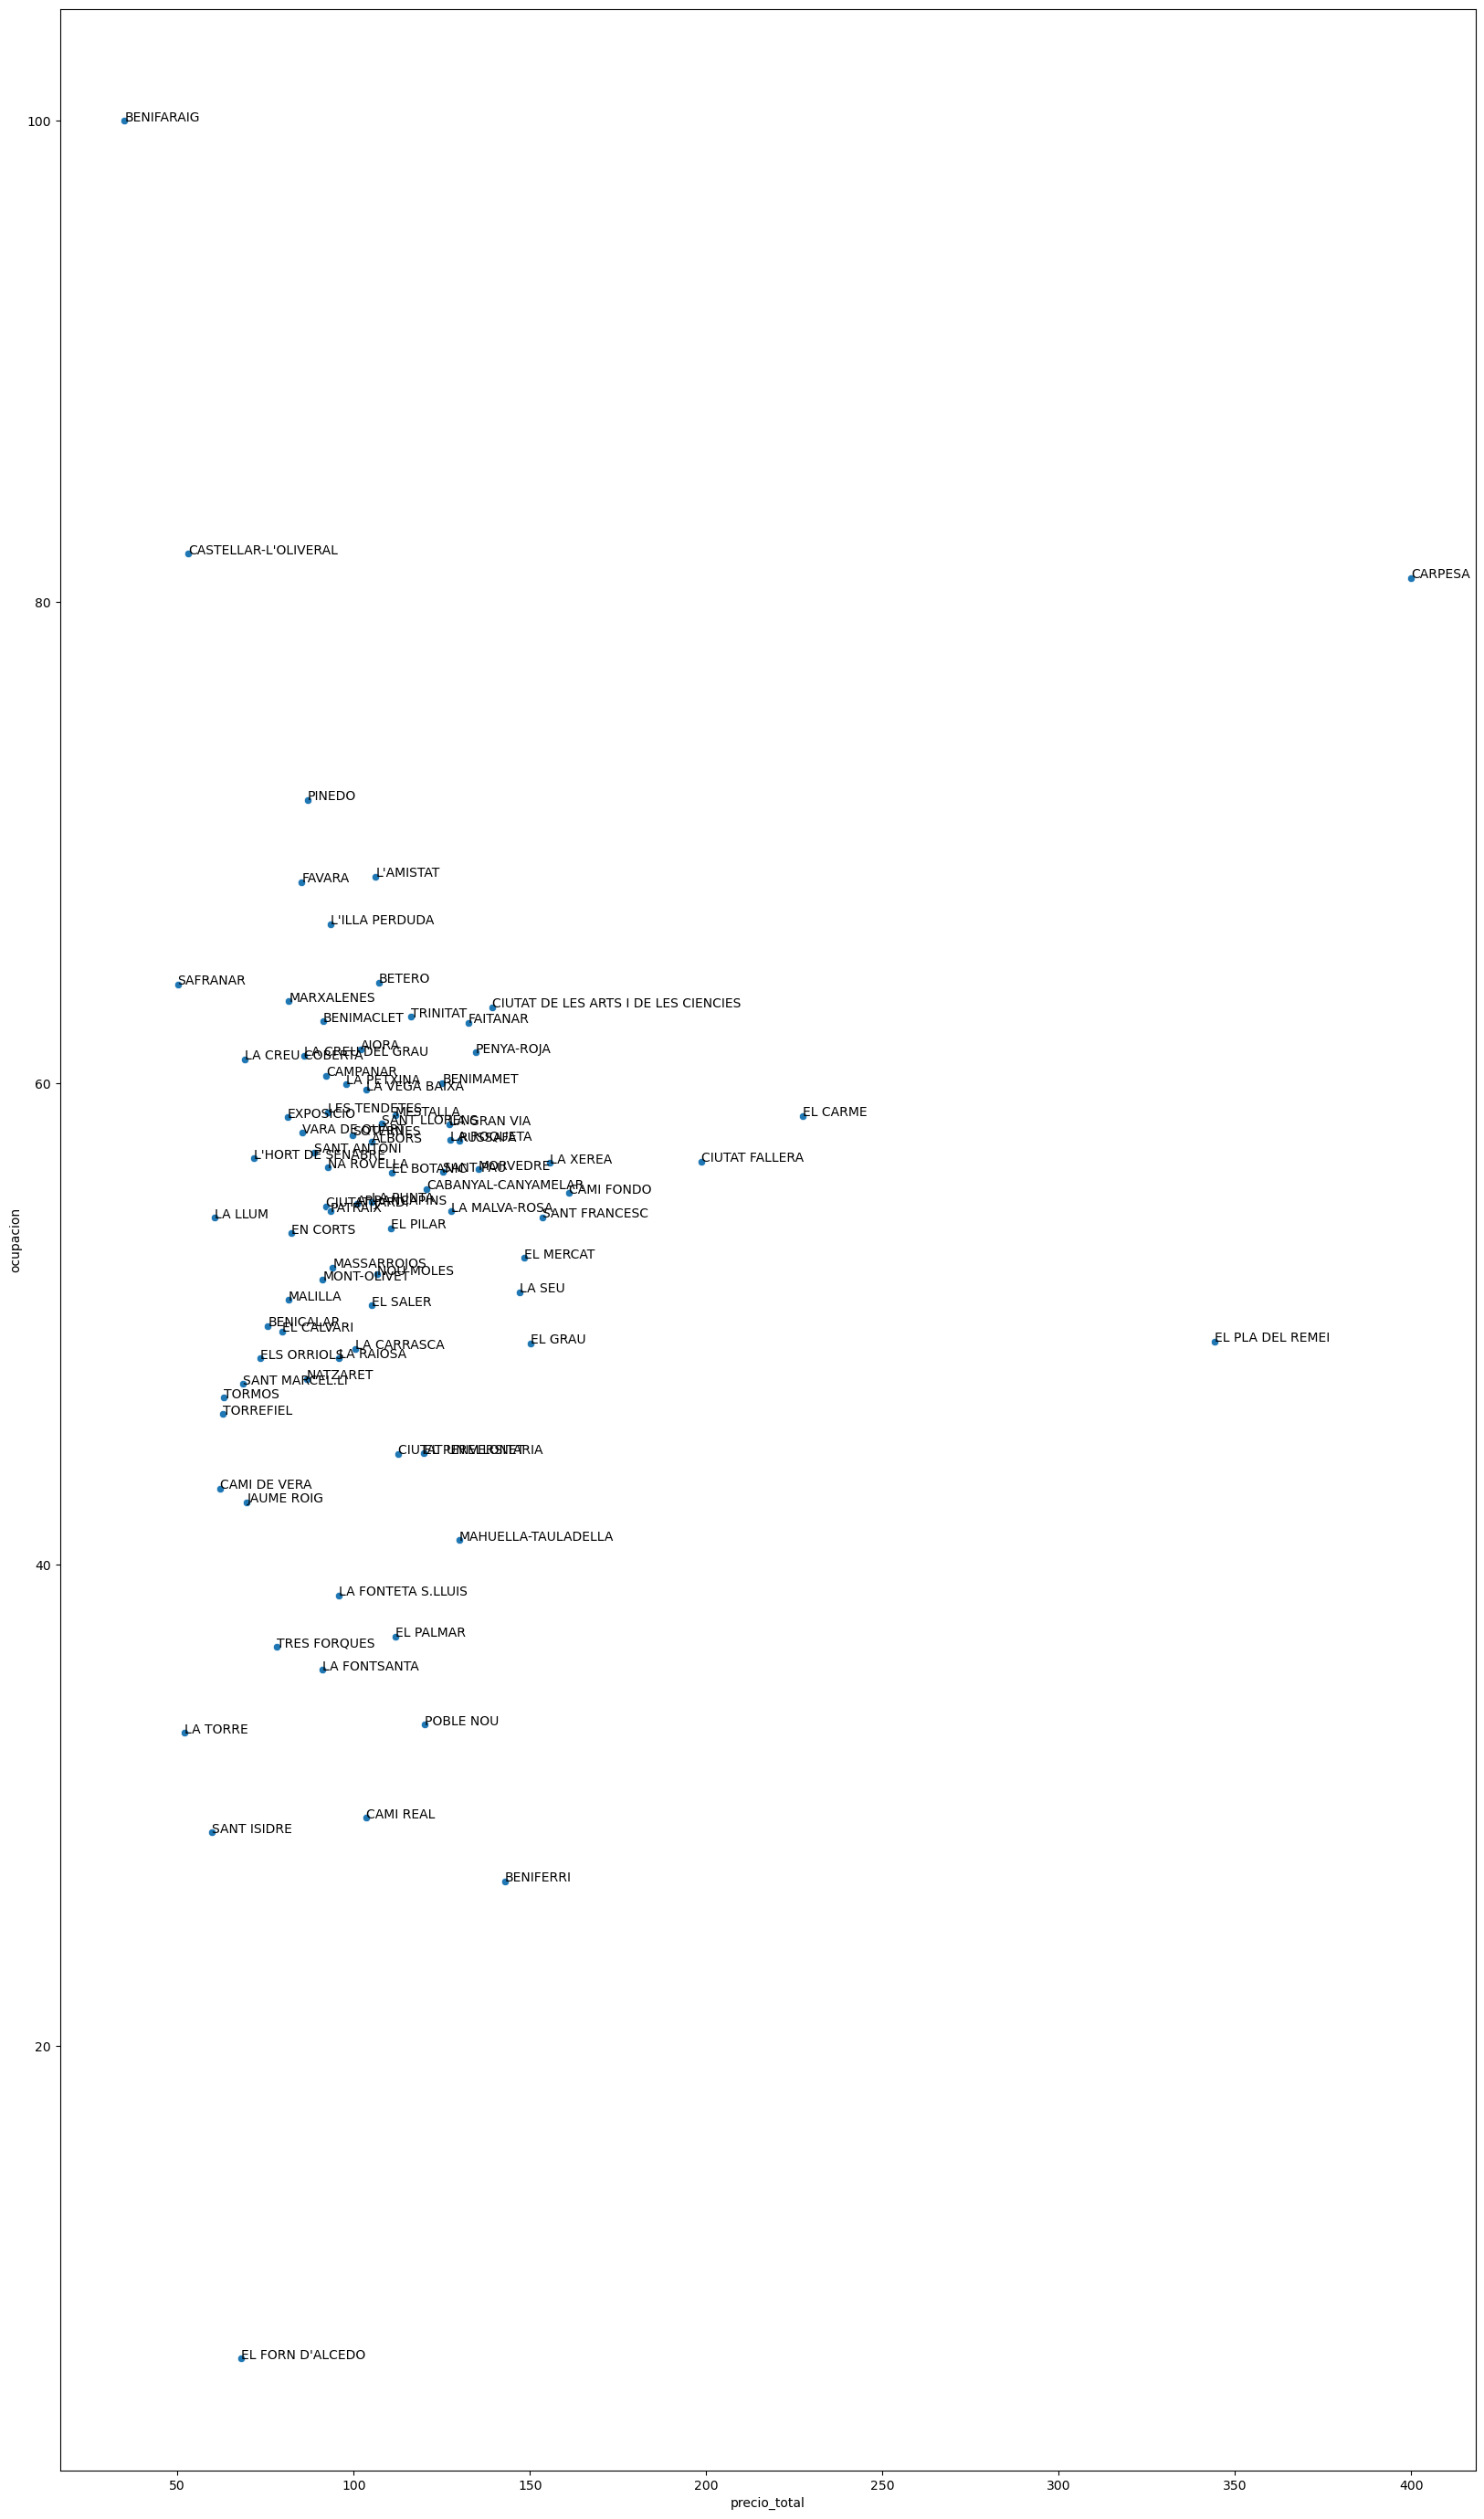

In [35]:
plt.figure(figsize = (20,35))
sns.scatterplot(data = temp, x = 'precio_total', y = 'ocupacion')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_total[cada], temp.ocupacion[cada], temp.index[cada])

**Insight 5 : Existen barrios con  gran diferencias de ocupacion**:

Alto precio alquiler- Alta ocupación: EL CARMEN, EL PLA-REMEI

Descartaríamos:
-Bajo precio del alquiler  y baja ocupacion: EL FORN D'ALCEDO

#### **¿Qué factores (a parte de la localización determinan la ocupación?**

In [70]:
#Paso 1: Seleccionar qué variables serán la métricas y cuales las dimensiones
metricas = ['ocupacion','precio_compra']
dimensiones = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc','m2','neighbourhood','distrito']

minicubo_ocupacion = df[dimensiones + metricas]
minicubo_ocupacion

,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,neighbourhood,distrito,ocupacion,precio_compra
0,02_Dos,4-5,1-2,91-807,70,MORVEDRE,LA SAIDIA,85,95599.0
1,01_Una,0-3,1-2,1-13,50,LA SEU,CIUTAT VELLA,100,113925.0
2,03_Tres,6-16,3-4,91-807,90,ARRANCAPINS,EXTRAMURS,100,168210.0
3,04_Cuatro o mas,6-16,5-68,91-807,150,LA MALVA-ROSA,POBLATS MARITIMS,76,227640.0
4,01_Una,0-3,1-2,14-90,50,EL MERCAT,CIUTAT VELLA,98,113925.0
...,...,...,...,...,...,...,...,...,...
8319,04_Cuatro o mas,0-3,3-4,1-13,120,LA CARRASCA,ALGIROS,26,190932.0
8320,01_Una,0-3,1-2,1-13,50,RUSSAFA,L'EIXAMPLE,92,122955.0
8321,01_Una,0-3,1-2,1-13,50,BENIMACLET,BENIMACLET,26,72835.0
8322,02_Dos,0-3,1-2,1-13,70,SANT FRANCESC,CIUTAT VELLA,26,159495.0


In [71]:
#Paso 2: pasar a transaccional las dimensiones
minicubo_ocupacion = minicubo_ocupacion.melt(id_vars=['ocupacion','precio_compra'])
minicubo_ocupacion

,ocupacion,precio_compra,variable,value
0,85,95599.0,bedrooms_disc,02_Dos
1,100,113925.0,bedrooms_disc,01_Una
2,100,168210.0,bedrooms_disc,03_Tres
3,76,227640.0,bedrooms_disc,04_Cuatro o mas
4,98,113925.0,bedrooms_disc,01_Una
...,...,...,...,...
58263,26,190932.0,distrito,ALGIROS
58264,92,122955.0,distrito,L'EIXAMPLE
58265,26,72835.0,distrito,BENIMACLET
58266,26,159495.0,distrito,CIUTAT VELLA


In [72]:
#Paso 3: Agregar las métricas por "variable" y "valor" con las funciones deseadas
minicubo_ocupacion = minicubo_ocupacion.groupby(['variable','value'])[['ocupacion','precio_compra']].agg('mean')
minicubo_ocupacion

ocupacion  precio_compra
variable               value                                  
accommodates_disc      0-3            54.559343   90605.196277
                       4-5            56.222261  121927.346435
                       6-16           55.670732  159009.326982
bedrooms_disc          01_Una         53.088936   87336.475532
                       02_Dos         57.170819  125923.249110
...                                         ...            ...
neighbourhood          TRINITAT       62.757576   98909.787879
                       VARA DE QUART  57.933333   71302.000000
number_of_reviews_disc 1-13           52.176034  108294.833533
                       14-90          57.455200  112590.861600
                       91-807         60.015216  121568.595253

[122 rows x 2 columns]

*Ahora vamos analizando sobre cada variable*

In [73]:
minicubo_ocupacion.loc['bedrooms_disc']

,ocupacion,precio_compra
value,,
01_Una,53.088936,87336.475532
02_Dos,57.170819,125923.249110
03_Tres,57.877404,150436.225962
04_Cuatro o mas,64.026895,215350.070905


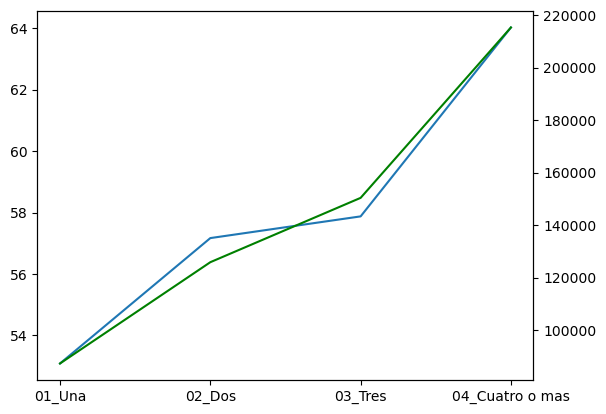

In [74]:
f, ax = plt.subplots()
ax.plot(minicubo_ocupacion.loc['bedrooms_disc'].ocupacion)
ax2 = ax.twinx()
ax2.plot(minicubo_ocupacion.loc['bedrooms_disc'].precio_compra,color = 'green');

Comprobamos que los alojamientos con dos habitaciones tienen similar ocupacion pero menor precio que las de 03

**Insight 6: Optar por invertir en alojamientos de 02 habitaciones frente a los de 03, tienen misma ocupacion (%) y son mas baratos de comprar**

In [75]:
minicubo_ocupacion.loc['beds_disc']

,ocupacion,precio_compra
value,,
1-2,54.169111,94195.848895
3-4,58.358769,136194.216273
5-68,53.371681,183202.364602


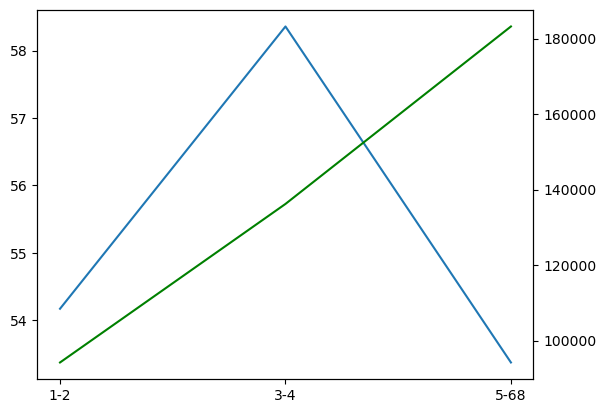

In [76]:
f, ax = plt.subplots()
ax.plot(minicubo_ocupacion.loc['beds_disc'].ocupacion)
ax2 = ax.twinx()
ax2.plot(minicubo_ocupacion.loc['beds_disc'].precio_compra,color = 'green');

Claramente hay un punto óptimo  de ocupacion en los alojamientos de 3-4 camas

**Insight 7: Priorizar la compra de alojamientos con 3-4**

In [77]:
minicubo_ocupacion.loc['accommodates_disc']

,ocupacion,precio_compra
value,,
0-3,54.559343,90605.196277
4-5,56.222261,121927.346435
6-16,55.670732,159009.326982


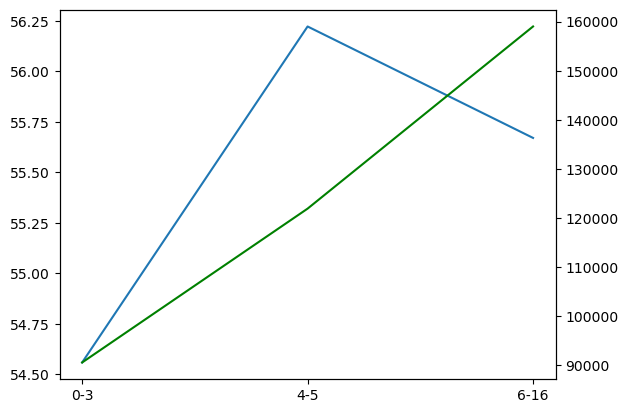

In [78]:
f, ax = plt.subplots()
ax.plot(minicubo_ocupacion.loc['accommodates_disc'].ocupacion)
ax2 = ax.twinx()
ax2.plot(minicubo_ocupacion.loc['accommodates_disc'].precio_compra,color = 'green');

Hay un pico claro en los alojamientos para 4-5 personas

**Insight 8: Alojamientos para 4-5 personas tienen la mayor tasa de ocupacion**

In [60]:
minicubo_ocupacion.loc['number_of_reviews_disc']

,ocupacion,precio_compra
value,,
1-13,52.176034,108294.833533
14-90,57.455200,112590.861600
91-807,60.015216,121568.595253


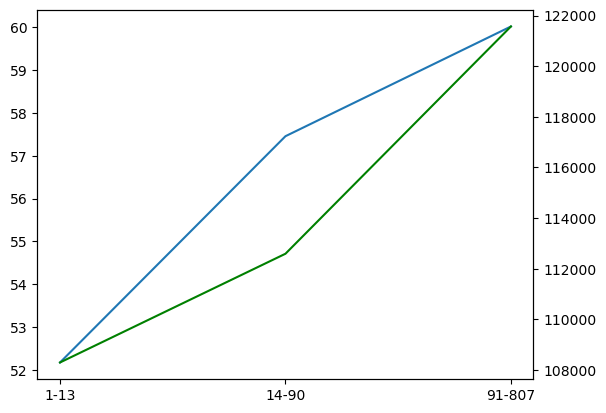

In [61]:
f, ax = plt.subplots()
ax.plot(minicubo_ocupacion.loc['number_of_reviews_disc'].ocupacion)
ax2 = ax.twinx()
ax2.plot(minicubo_ocupacion.loc['number_of_reviews_disc'].precio_compra,color = 'green');

No vemos nada significativo, las graficas guardan una relación lineal

#### **¿Cual es la relación entre el tamaño del inmueble y su grado de ocupación?**

In [63]:
minicubo_ocupacion.loc['m2']

,ocupacion,precio_compra
value,,
50,53.088936,87336.475532
70,57.170819,125923.249110
90,57.877404,150436.225962
120,64.433121,201013.070064
150,62.684211,262737.631579


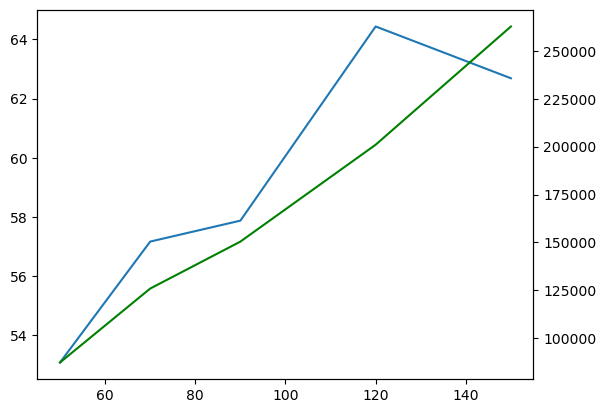

In [64]:
f, ax = plt.subplots()
ax.plot(minicubo_ocupacion.loc['m2'].ocupacion)
ax2 = ax.twinx()
ax2.plot(minicubo_ocupacion.loc['m2'].precio_compra,color = 'green');

**Conclusiones :**
 - Priorizar compra de alojamientos de 70 m2 frente los de 90 m2, tienen misma ocupación y son mas baratos de comprar
 - Evitar compra de pisos de 150 m2,  priorizar la compra de los  120 m2, tienen la mayor tasa de ocupacion, y son bastante mas económicos ( 60.000€ de media) 

**Insight 9: Existen viviendas que disfrutan de una ocupación más elevada en proporción a su superficie**